In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
from scipy import stats

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [3]:
test = pd.read_csv("data/test.csv")
test.head()

,Unnamed: 0,text_id,full_text
0,0,0000C359D63E,when a person has no experience on a job their...
1,1,000BAD50D026,Do you think students would benefit from being...
2,2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."
3,3,hp,Dumbledore and Professor McGonagall bent forwa...
4,4,tkm,"Being Southerners, it was a source of shame to..."


### EDA: Getting to know our data

In [4]:
#add a new column to reflect the length of article
length = []
for i in train['full_text']:
    leng = len(i.split())
    length.append(leng)

In [5]:
train['full_text'] = train["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)
test['full_text'] = test["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)

In [6]:
train['text_length']=length
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533
2,00299B378633,"Dear, Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,320
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234
...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510


In [7]:
des_df = train[['cohesion','syntax','vocabulary','phraseology','grammar','conventions']]
des_df

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,3.5,3.5,3.0,3.0,4.0,3.0
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...
3906,2.5,3.0,3.0,3.5,2.5,2.5
3907,4.0,4.0,4.0,4.0,3.5,3.0
3908,2.5,3.0,3.0,3.0,3.5,3.0
3909,4.0,4.5,4.5,4.0,4.5,4.5


### Statistical Description for Train Dataset

In [8]:
des_train = des_df.select_dtypes(['int','float']).describe().T
#des_train = des_train.set_index('index')
reset_train = des_df.select_dtypes(['int','float']).describe().T.reset_index(drop=False) 
reset_train.style.background_gradient(cmap='Greens')

,index,count,mean,std,min,25%,50%,75%,max
0,cohesion,3911.000000,3.127077,0.662542,1.000000,2.500000,3.000000,3.500000,5.000000
1,syntax,3911.000000,3.028254,0.644399,1.000000,2.500000,3.000000,3.500000,5.000000
2,vocabulary,3911.000000,3.235745,0.583148,1.000000,3.000000,3.000000,3.500000,5.000000
3,phraseology,3911.000000,3.116850,0.655997,1.000000,2.500000,3.000000,3.500000,5.000000
4,grammar,3911.000000,3.032856,0.699841,1.000000,2.500000,3.000000,3.500000,5.000000
5,conventions,3911.000000,3.081053,0.671450,1.000000,2.500000,3.000000,3.500000,5.000000


In [9]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
import pandas as pd
import numpy as np

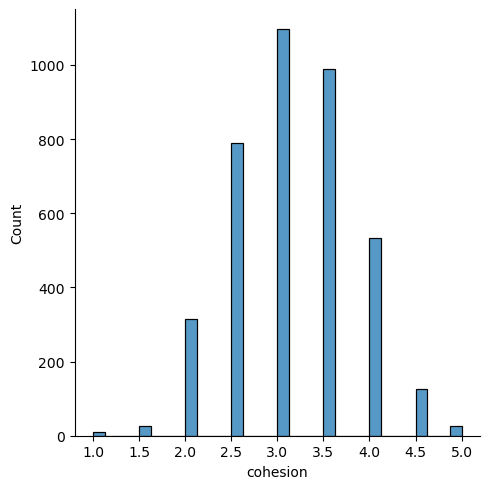

In [10]:
sns.displot(data = des_df, x = des_df['cohesion'])

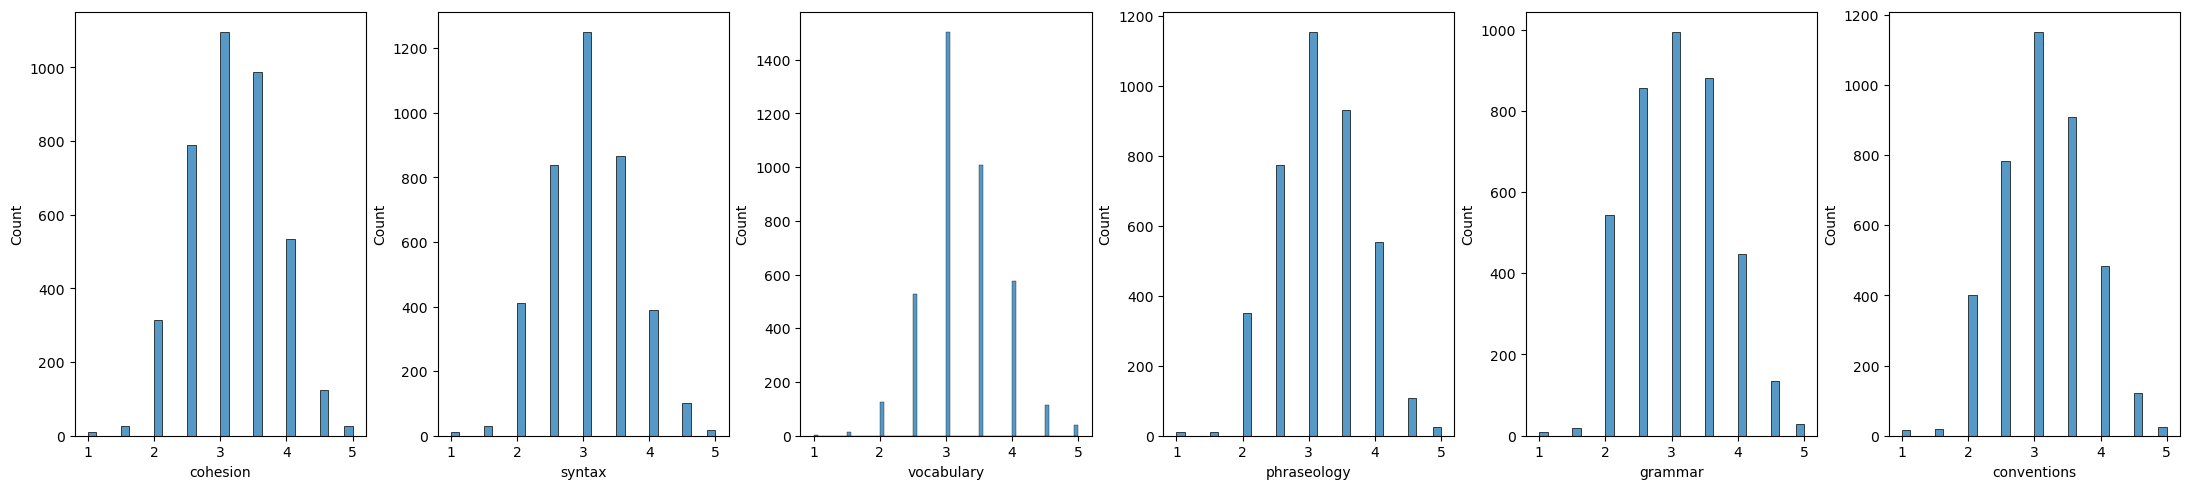

In [11]:
figure = plt.figure(figsize = (22,5))
for i ,col in enumerate(des_df.columns):
    ax = plt.subplot(1, 6, i+1)
   
    sns.histplot(data = des_df, x = des_df[col])
figure.tight_layout(h_pad=1.0, w_pad=0.5)

plt.show()

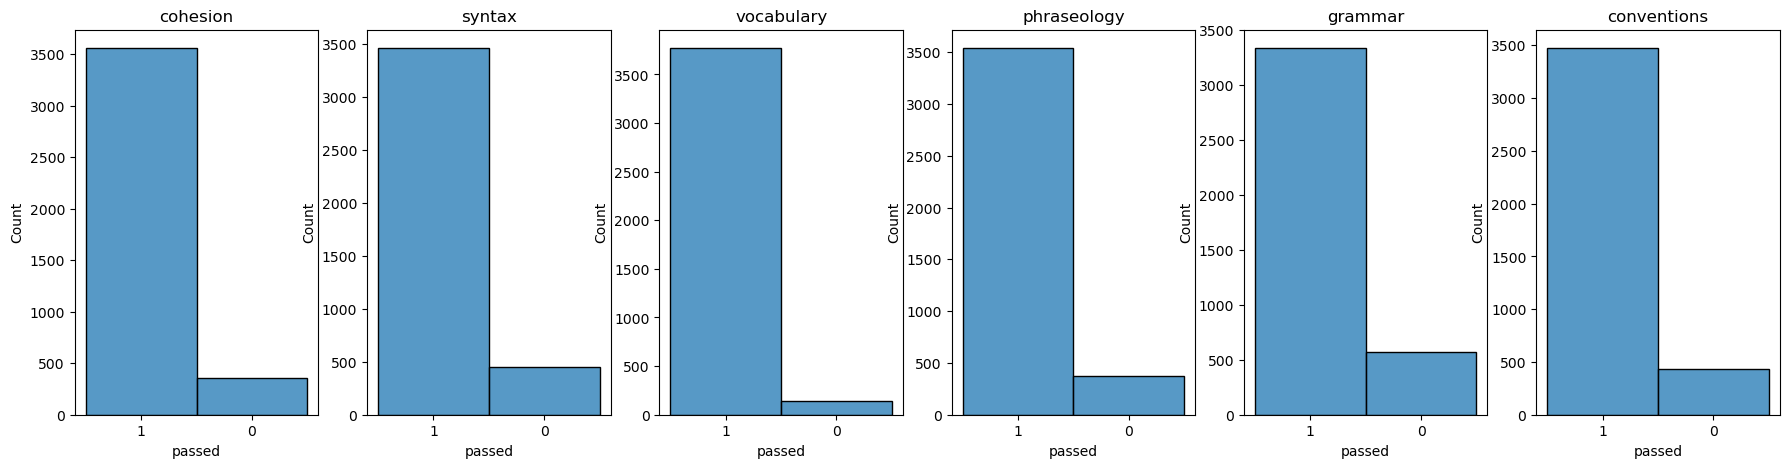

In [12]:
figure = plt.figure(figsize = (22,5))
for i, col in enumerate(des_df.columns):
    ax = plt.subplot(1, 6, i+1)
    des_df['passed'] = np.select([(des_df[col] >= 2.5), (des_df[col] < 2.5)],[1,0], default='Not Specified')    
    sns.histplot(des_df.passed, label = ['Failures','Passes'],)
    del des_df['passed']
    ax.set_title(col)
plt.show()

/var/folders/4z/rb211ylj27qc1wmrxcb4fngr0000gn/T/ipykernel_28916/408442290.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['total_score'])


Text(0.5, 1.0, 'Total Score Counts')

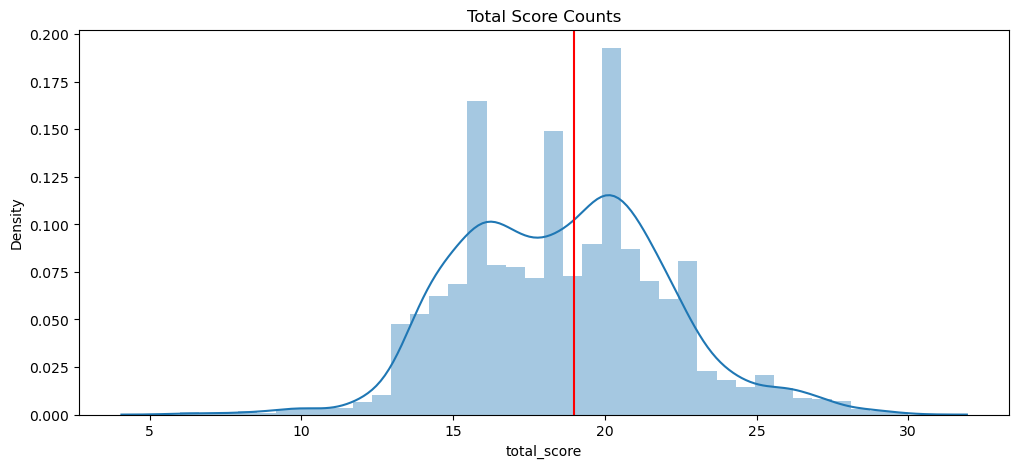

In [13]:
train['total_score'] = train['cohesion'] + train['syntax'] + train['vocabulary'] + \
                       train['phraseology'] + train['grammar'] + train['conventions']

avg_score = round(train['total_score'].mean())
plt.figure(figsize = (12,5))
sns.distplot(train['total_score'])
plt.axvline(x = avg_score, color = 'red')
plt.title('Total Score Counts')

/var/folders/4z/rb211ylj27qc1wmrxcb4fngr0000gn/T/ipykernel_28916/1379502966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['text_length'])


Text(0.5, 1.0, 'Lengh of Text Counts')

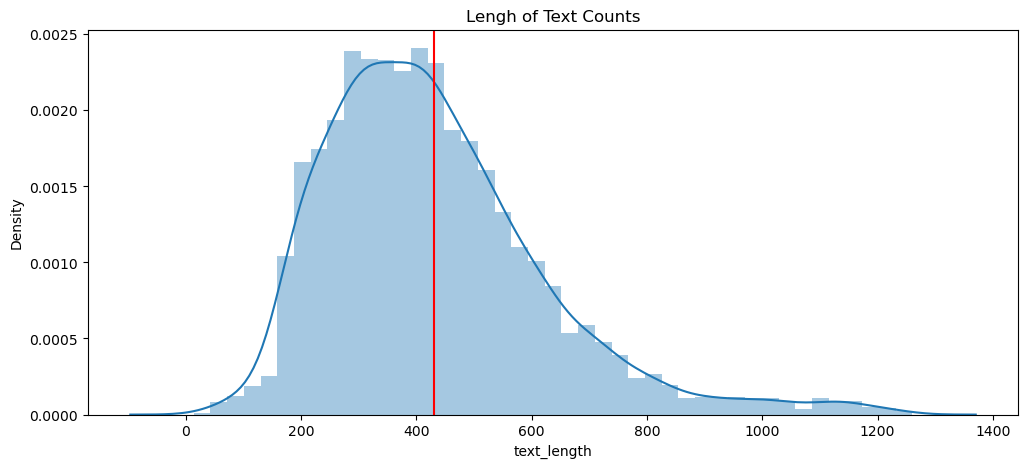

In [14]:
plt.figure(figsize = (12,5))
sns.distplot(train['text_length'])
plt.axvline(x = train['text_length'].mean(), color = 'red')
plt.title('Lengh of Text Counts')

In [15]:
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length,total_score
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,20.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,14.5
2,00299B378633,"Dear, Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,320,18.0
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,27.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,16.5
...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,17.0
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,22.5
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,18.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510,26.0


Correlation

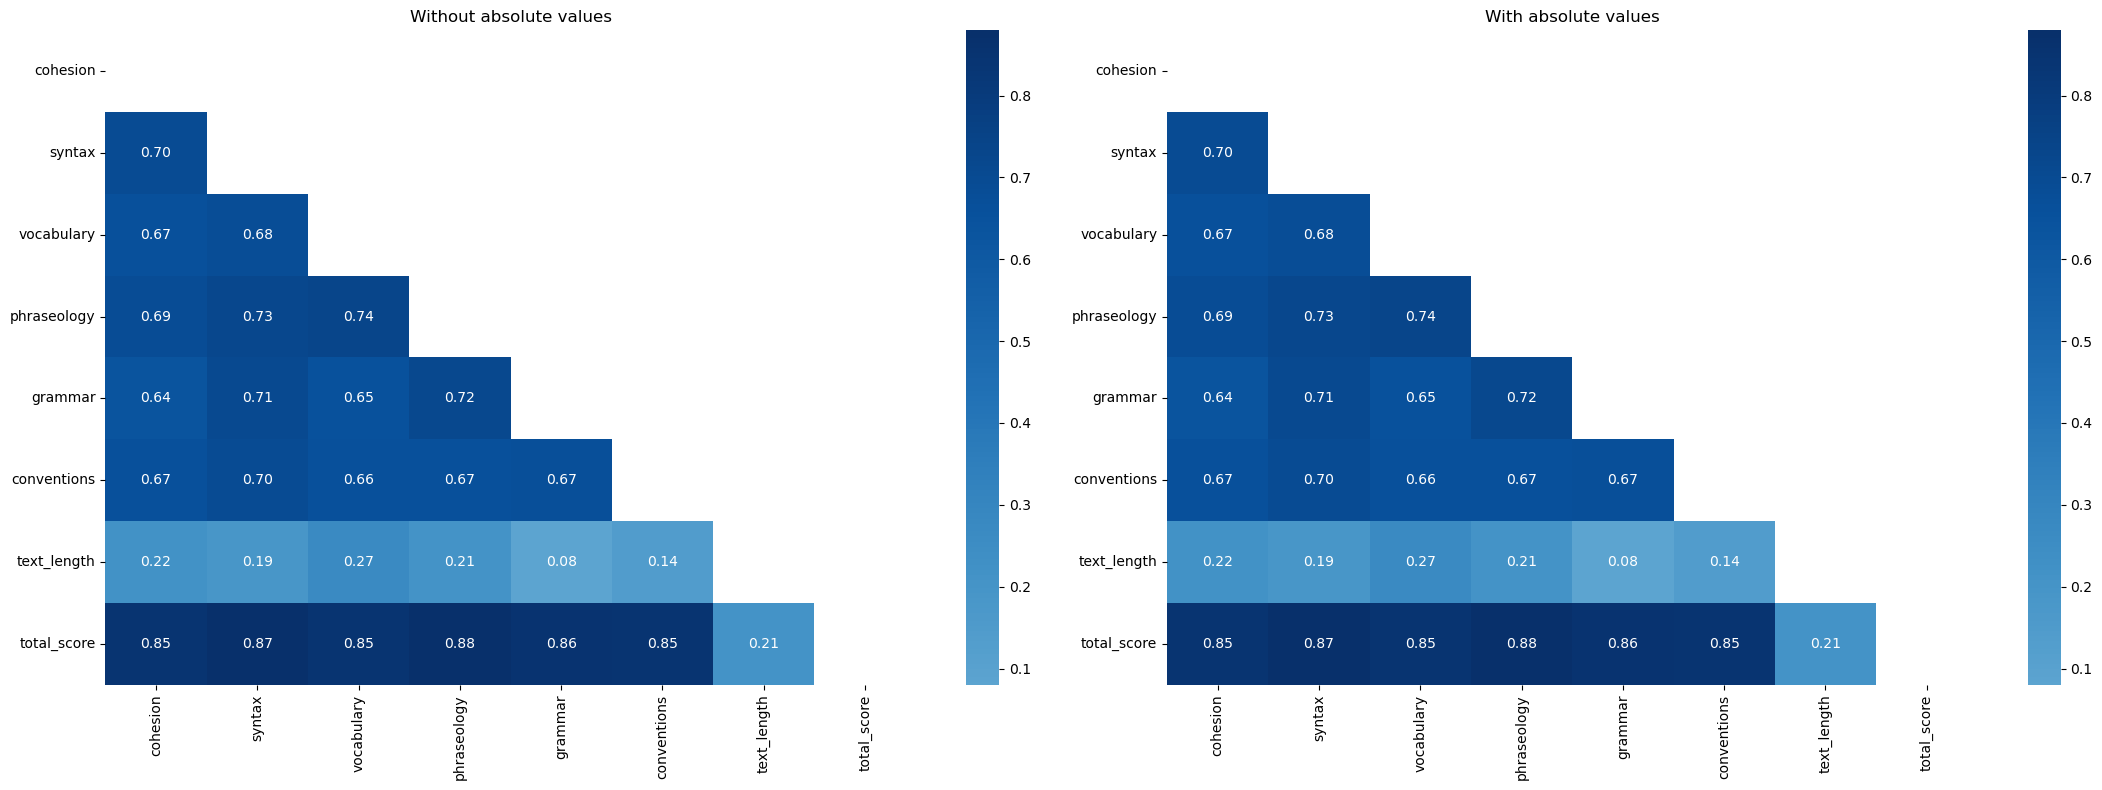

In [16]:
corr= train.select_dtypes(['int','float']).corr()
matrix = np.triu(corr)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))

sns.heatmap(corr, mask=matrix, center = 0, cmap = 'Blues', ax = axes[0], 
            annot=True, fmt='.2f').set_title('Without absolute values')

sns.heatmap(abs(corr), mask=matrix, center = 0, cmap = 'Blues', ax = axes[1], 
           annot=True, fmt='.2f').set_title('With absolute values')

fig.tight_layout(h_pad=1.0, w_pad=0.5)

## Comparing result with textstat

In [25]:
import textstat
import pandas as pd

In [28]:
testdf = pd.read_csv('data/test.csv')
testdf

,Unnamed: 0,text_id,full_text
0,0,0000C359D63E,when a person has no experience on a job their...
1,1,000BAD50D026,Do you think students would benefit from being...
2,2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."
3,3,hp,Dumbledore and Professor McGonagall bent forwa...
4,4,tkm,"Being Southerners, it was a source of shame to..."
5,5,high school,"With the development of the technology, more a..."
6,6,college1,“We need to move to a place with an elevator.”...
7,7,college2,In the article “Beyond borders: what it means ...


In [29]:
ease_score = []
dale = []
for i in enumerate(testdf['full_text']):
    ease_score.append(textstat.flesch_reading_ease(str(i)))
    dale.append(textstat.dale_chall_readability_score(str(i)))
print(ease_score)
print(dale)


[54.63, 52.97, 22.56, 68.23, 41.87, 36.73, 69.72, 25.66]
[7.01, 6.27, 9.28, 8.86, 9.63, 10.02, 7.85, 9.47]


In [30]:
testdf['ease_score'] = ease_score
testdf['readability'] = ['Standard','Fairly Easy','Fairly Easy','Easy','Difficult','Fairly Difficult','Fairly Easy','Difficult']
testdf['dale_score'] = dale
testdf['grade level'] = ['average 7th or 8th-grade student',
                         'average 5th or 6th-grade student',
                         'average 7th or 8th-grade student',
                         'average 11th or 12th-grade student',
                         'average 13th to 15th-grade (college) student',
                         'average 13th to 15th-grade (college) student',
                         'average 9th or 10th-grade student',
                         'average 13th to 15th-grade (college) student']
testdf

,Unnamed: 0,text_id,full_text,ease_score,readability,dale_score,grade level
0,0,0000C359D63E,when a person has no experience on a job their...,54.63,Standard,7.01,average 7th or 8th-grade student
1,1,000BAD50D026,Do you think students would benefit from being...,52.97,Fairly Easy,6.27,average 5th or 6th-grade student
2,2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde...",22.56,Fairly Easy,9.28,average 7th or 8th-grade student
3,3,hp,Dumbledore and Professor McGonagall bent forwa...,68.23,Easy,8.86,average 11th or 12th-grade student
4,4,tkm,"Being Southerners, it was a source of shame to...",41.87,Difficult,9.63,average 13th to 15th-grade (college) student
5,5,high school,"With the development of the technology, more a...",36.73,Fairly Difficult,10.02,average 13th to 15th-grade (college) student
6,6,college1,“We need to move to a place with an elevator.”...,69.72,Fairly Easy,7.85,average 9th or 10th-grade student
7,7,college2,In the article “Beyond borders: what it means ...,25.66,Difficult,9.47,average 13th to 15th-grade (college) student
